In [400]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as st1
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

In [431]:
data = np.loadtxt("C:/Users/Danila/Desktop/Статистика/Практика3/ИНБО-06/вариант8/3.txt")

In [432]:
Xs1 = np.mean(data) #среднее выборочное
Qs1 = np.std(data) #среднеквадратическое отклонение
N = len(data) #кол-во объектов в выборке
n_groups = 1+math.floor(math.log(N,2))
h = abs((max(data))-(min(data))) / n_groups
print(Xs1, Qs1)
print(min(data), max(data))
print(1/Qs1)

4.584321044055952 4.913406273929064
0.034539816508860045 21.71998335117443
0.20352479405297338


In [433]:
low = np.arange(min(data), max(data), h)
upp = np.arange(min(data)+h, max(data)+h, h+0.001)
med = (low+upp)/2
table_cut = pd.DataFrame({'values': data, 'groups': pd.cut(data, n_groups)})
table_hist = table_cut.groupby('groups').count()
table_hist['abs_freq'] = table_cut.groupby('groups').count()
table_hist['p'] = table_cut.groupby('groups').count()/N
table_hist['low'] = low
table_hist['upp'] = upp
table_hist['med'] = med

In [434]:
Xs2 = sum(table_hist.med*table_hist.p)
Qs2 = sum((table_hist.med - Xs2)**2*table_hist.p)**0.5

,values,abs_freq,p,low,upp,med
groups,,,,,,
"(0.0129, 3.649]",17,17,0.53125,0.034540,3.648780,1.841660
"(3.649, 7.263]",8,8,0.25000,3.648780,7.264021,5.456401
"(7.263, 10.877]",4,4,0.12500,7.263021,10.879262,9.071141
"(10.877, 14.492]",1,1,0.03125,10.877262,14.494502,12.685882
"(14.492, 18.106]",1,1,0.03125,14.491502,18.109743,16.300622
"(18.106, 21.72]",1,1,0.03125,18.105743,21.724983,19.915363


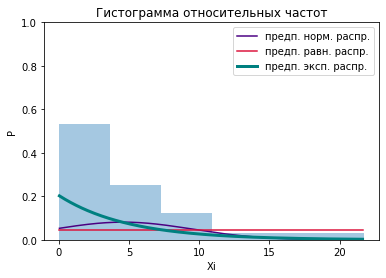

In [435]:
plt.bar(table_hist.med, table_hist.p, h, alpha = 0.4)
plt.title("Гистограмма относительных частот")
plt.xlabel("Xi")
plt.ylabel("P")
linex = np.arange(min(data),max(data),0.1)
def normal_dist(x, mu, q):
    return (1/(q*(2*np.pi)**0.5))*np.exp(-((x-mu)**2)/(2*q**2))
def ravnomern_dist(a, b):
    return 1/(b-a)
def exp_dist(x, lamda):
    return lamda * np.exp(-1 * lamda *x)
liney1 = normal_dist(linex, Xs1, Qs1)
liney2 = ravnomern_dist(min(data), max(data)) + linex*0
liney3 = exp_dist(linex, 1/Qs1)
plt.plot(linex, liney1, color = '#4B0082', label = "предп. норм. распр.")
plt.plot(linex, liney2, color = '#DC143C', label = "предп. равн. распр.")
plt.plot(linex, liney3, color = '#008080', label = "предп. эксп. распр.", linewidth = 3)
plt.legend()
None
plt.ylim(0, 1)
table_hist

In [436]:
def integrate_norm(upper, Mu, Sd):
    lower = -1000
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = normal_dist(arrx, Mu, Sd)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S
def chisq_test_norm(table_hist, mean, sd):
    N = sum(table_hist.abs_freq)
    pract = table_hist.abs_freq
    theor = np.empty(table_hist.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_norm(upp[i], mean, sd) - integrate_norm(low[i], mean, sd))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d

In [437]:
def integrate_ravn(lower, upper, a, b):
    x = upper - lower
    y = 1/(b-a)
    return x*y 
def chisq_test_ravn(table_hist):
    N = sum(table_hist['abs_freq'])
    pract = table_hist['abs_freq']
    theor = np.empty(table_hist.shape[0])
    for i in range (len(theor)):
        theor[i] = N * integrate_ravn(low[i], upp[i], min(table_hist['med']), max(table_hist['med']))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d

In [438]:
def integrate_exp(upper, lamda):
    h = 0.01
    arrx = np.arange(0, 1000, h)
    up = math.ceil(upper*100)
    arry = exp_dist(arrx, lamda)
    S = 0
    for i in range(0, up):
        S+=abs(arry[i]*h)
    return S
def chisq_test_exp(table_hist_e, sd):
    N = sum(table_hist_e['abs_freq'])
    table_test = pd.DataFrame({'pract': table_hist_e.abs_freq})
    table_test['theor'] = 1
    for i in range (len(table_test.pract)):
        table_test.theor.iloc[i] = N * abs(integrate_exp(table_hist_e.low.iloc[i], sd) - integrate_exp(table_hist_e.upp.iloc[i], sd))
    chisq_d = sum((table_test.pract-table_test.theor)**2/table_test.theor)
    return chisq_d

In [439]:
print("Normal dist -", chisq_test_norm(table_hist, Xs1, Qs1) < st1.chi2.ppf(0.975, n_groups-2-1))
print(chisq_test_norm(table_hist, Xs1, Qs1), st1.chi2.ppf(0.975, n_groups-2-1))

Normal dist - False
22.09401599300913 9.348403604496148


In [440]:
print("Ravnomern dist -", chisq_test_ravn(table_hist) < st1.chi2.ppf(0.975, n_groups - 2-1))
print(chisq_test_ravn(table_hist), st1.chi2.ppf(0.975, n_groups-2-1))

Ravnomern dist - False
32.549619897752734 9.348403604496148


In [441]:
print("Exponentional dist -",chisq_test_exp(table_hist, 1/Qs1) < st1.chi2.ppf(0.975, n_groups-2))
print(chisq_test_exp(table_hist, 1/Qs1), st1.chi2.ppf(0.975, n_groups-2-1))

Exponentional dist - True
1.2224825970525868 9.348403604496148


,med,p,x_norm,y_norm,x_exp,y_exp,x_rav,y_rav
groups,,,,,,,,
"(0.0129, 3.649]",1.841660,0.53125,10.003924,-0.632523,1.841660,-0.632523,1.841660,0.53125
"(3.649, 7.263]",5.456401,0.25000,0.204162,-1.386294,5.456401,-1.386294,5.456401,0.78125
"(7.263, 10.877]",9.071141,0.12500,16.537099,-2.079442,9.071141,-2.079442,9.071141,0.90625
"(10.877, 14.492]",12.685882,0.03125,59.002735,-3.465736,12.685882,-3.465736,12.685882,0.93750
"(14.492, 18.106]",16.300622,0.03125,127.601070,-3.465736,16.300622,-3.465736,16.300622,0.96875
"(18.106, 21.72]",19.915363,0.03125,222.332104,-3.465736,19.915363,-3.465736,19.915363,1.00000


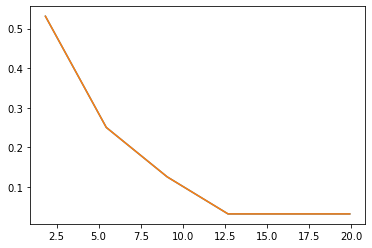

In [442]:
table_anam = pd.DataFrame({'med': table_hist.med, 'p':table_hist.p })
table_anam["p"] = table_anam["p"].replace(0, np.nan).bfill()
plt.plot(table_hist.med, table_hist.p)
table_anam['x_norm'] = (table_anam.med - Xs2)**2
table_anam['y_norm'] = np.log(table_anam.p)
table_anam['x_exp'] = table_hist['med']
table_anam['y_exp'] = np.log(table_anam['p'])
table_anam['x_rav'] = table_anam.med
table_anam['y_rav'] = np.cumsum(table_anam['p'])
table_anam.fillna(method = "bfill", inplace=True) 
plt.plot(table_hist.med, table_hist.p)
x = np.array(table_anam['x_exp']).reshape(-1, 1)
table_anam

R^2 = 0.566439348949761


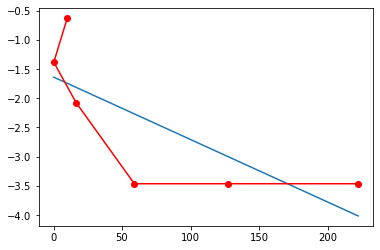

In [443]:
x = np.array(table_anam['x_norm']).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(x, table_anam.y_norm)
a =linear_model.intercept_
b =linear_model.coef_
qw = np.arange(min(x), max(x), 0.1)
qwe = qw*b+a
plt.plot(qw, qwe)
plt.plot(table_anam.x_norm, table_anam.y_norm, c = "red") 
plt.scatter(table_anam.x_norm, table_anam.y_norm, c = "red")
None
print("R^2 =", linear_model.score(x, table_anam.y_norm))

R^2 = 0.885531505559499


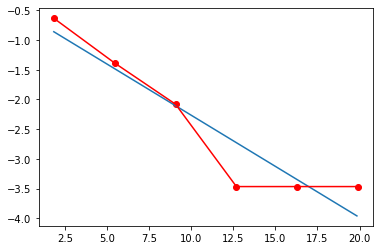

In [444]:
x = np.array(table_anam['x_exp']).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(x, table_anam.y_exp)
a =linear_model.intercept_
b =linear_model.coef_
qw = np.arange(min(x), max(x), 0.1)
qwe = qw*b+a
plt.plot(qw, qwe)
plt.plot(table_anam.x_exp, table_anam.y_exp, c = "red") 
plt.scatter(table_anam.x_exp, table_anam.y_exp, c = "red")
None
print("R^2 =", linear_model.score(x, table_anam.y_exp))

R^2 = 0.8023002421307508


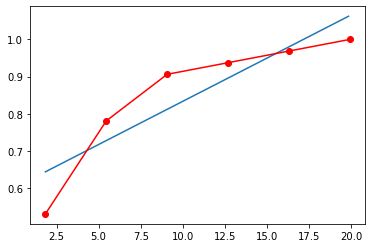

In [445]:
x = np.array(table_anam['x_rav']).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(x, table_anam.y_rav)
a =linear_model.intercept_
b =linear_model.coef_
qw = np.arange(min(x), max(x), 0.1)
qwe = qw*b+a
plt.plot(qw, qwe)
plt.plot(table_anam.x_rav, table_anam.y_rav, c = "red") 
plt.scatter(table_anam.x_rav, table_anam.y_rav, c = "red")
None
print("R^2 =", linear_model.score(x, table_anam.y_rav))